
🎭 Комедийный апскейл завершен!
├ Коэффициент: 4x
├ Исходный размер: (1920, 1080)
└ Новый размер: (7680, 4320)
⏱ Время обработки: 1.20 сек


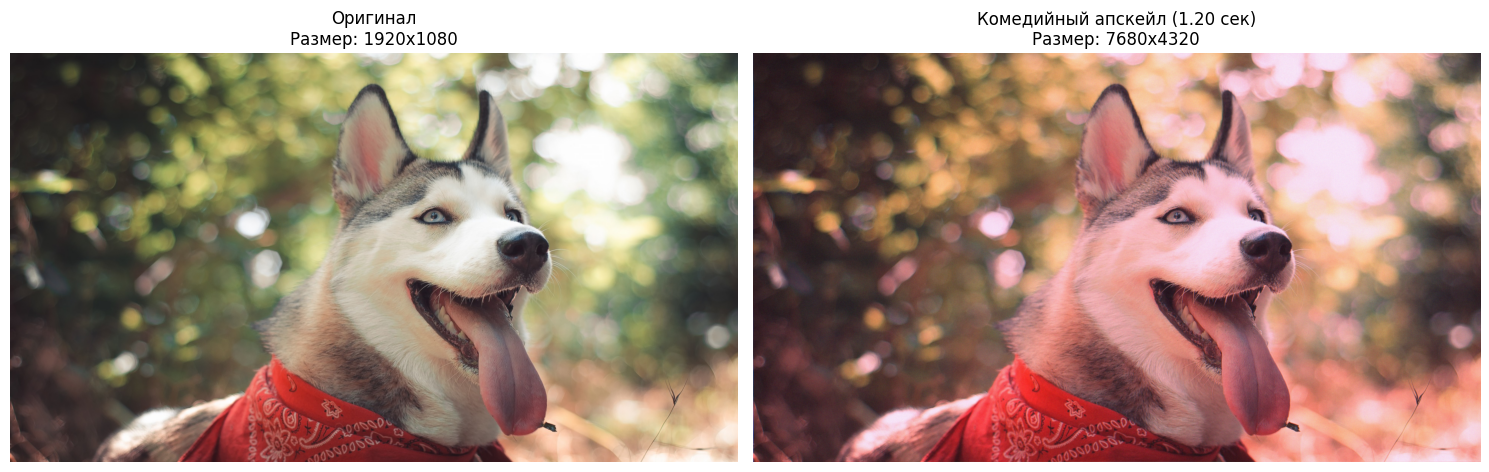


Результат сохранен как 'comedy_upscaled.jpg'
Сравнение сохранено как 'comedy_upscale_comparison.jpg'


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def comedy_upscale(input_path, output_path, scale=4):
    """
    Создает комедийный эффект апскейла изображения
    :param input_path: Путь к исходному изображению
    :param output_path: Путь для сохранения результата
    :param scale: Коэффициент увеличения
    """
    # Загрузка изображения
    img = cv2.imread(input_path)
    if img is None:
        raise FileNotFoundError(f"Не удалось загрузить изображение: {input_path}")
    
    original_size = img.shape[1], img.shape[0]
    
    # Простой апскейл с интерполяцией
    start_time = time.time()
    
    # 1. Первоначальное увеличение (создает размытость)
    upscaled = cv2.resize(img, (0, 0), fx=scale, fy=scale, 
                         interpolation=cv2.INTER_NEAREST)
    
    # 2. Добавление пиксельных артефактов
    pixelated = cv2.resize(upscaled, (upscaled.shape[1]//2, upscaled.shape[0]//2), 
                          interpolation=cv2.INTER_NEAREST)
    pixelated = cv2.resize(pixelated, (upscaled.shape[1], upscaled.shape[0]), 
                          interpolation=cv2.INTER_NEAREST)
    
    # 3. Смешивание с оригинальным апскейлом
    result = cv2.addWeighted(upscaled, 0.5, pixelated, 0.5, 0)
    
    # 4. Добавление цветовых искажений
    b, g, r = cv2.split(result)
    
    # Случайные смещения цветовых каналов
    offset_x = random.randint(-5, 5)
    offset_y = random.randint(-5, 5)
    b = np.roll(b, (offset_x, offset_y), (1, 0))
    g = np.roll(g, (offset_x//2, offset_y//2), (1, 0))
    
    # Усиление цветов
    r = cv2.multiply(r, 1.2)
    g = cv2.multiply(g, 0.9)
    
    result = cv2.merge([b, g, r])
    
    # 5. Добавление шума и артефактов
    noise = np.random.randint(-30, 30, result.shape, dtype=np.int16)
    result = cv2.add(result.astype(np.int16), noise)
    result = np.clip(result, 0, 255).astype(np.uint8)
    
    # 6. Финальное размытие
    result = cv2.GaussianBlur(result, (3, 3), 0)
    
    inference_time = time.time() - start_time
    new_size = result.shape[1], result.shape[0]
    
    # Сохранение результата
    cv2.imwrite(output_path, result)
    
    # Информация о процессе
    print(f"\n🎭 Комедийный апскейл завершен!")
    print(f"├ Коэффициент: {scale}x")
    print(f"├ Исходный размер: {original_size}")
    print(f"└ Новый размер: {new_size}")
    print(f"⏱ Время обработки: {inference_time:.2f} сек")
    
    return img, result, inference_time

def compare_results(original, upscaled, inference_time):
    """Визуальное сравнение оригинального и увеличенного изображения"""
    # Конвертация из BGR в RGB для matplotlib
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    upscaled_rgb = cv2.cvtColor(upscaled, cv2.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    
    # Оригинальное изображение
    ax[0].imshow(original_rgb)
    ax[0].set_title(f"Оригинал\nРазмер: {original.shape[1]}x{original.shape[0]}")
    ax[0].axis('off')
    
    # Увеличенное изображение
    ax[1].imshow(upscaled_rgb)
    ax[1].set_title(f"Комедийный апскейл ({inference_time:.2f} сек)\nРазмер: {upscaled.shape[1]}x{upscaled.shape[0]}")
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.savefig('comedy_upscale_comparison.jpg', dpi=120)
    plt.show()

if __name__ == "__main__":
    # Конфигурация
    input_image = "original.jpg"  # Замените на ваше изображение
    output_image = "comedy_upscaled.jpg"
    scale_factor = 4             # Коэффициент масштабирования
    
    # Выполнение апскейла
    original_img, upscaled_img, time_taken = comedy_upscale(
        input_image,
        output_image,
        scale=scale_factor
    )
    
    # Визуальное сравнение
    compare_results(original_img, upscaled_img, time_taken)
    
    print(f"\nРезультат сохранен как '{output_image}'")
    print(f"Сравнение сохранено как 'comedy_upscale_comparison.jpg'")